In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [5]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
x = df.iloc[:,0:-1]

In [7]:
x.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491


In [8]:
y = df.iloc[:,-1:]

In [9]:
y.head()

,House price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   House price of unit area  414 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


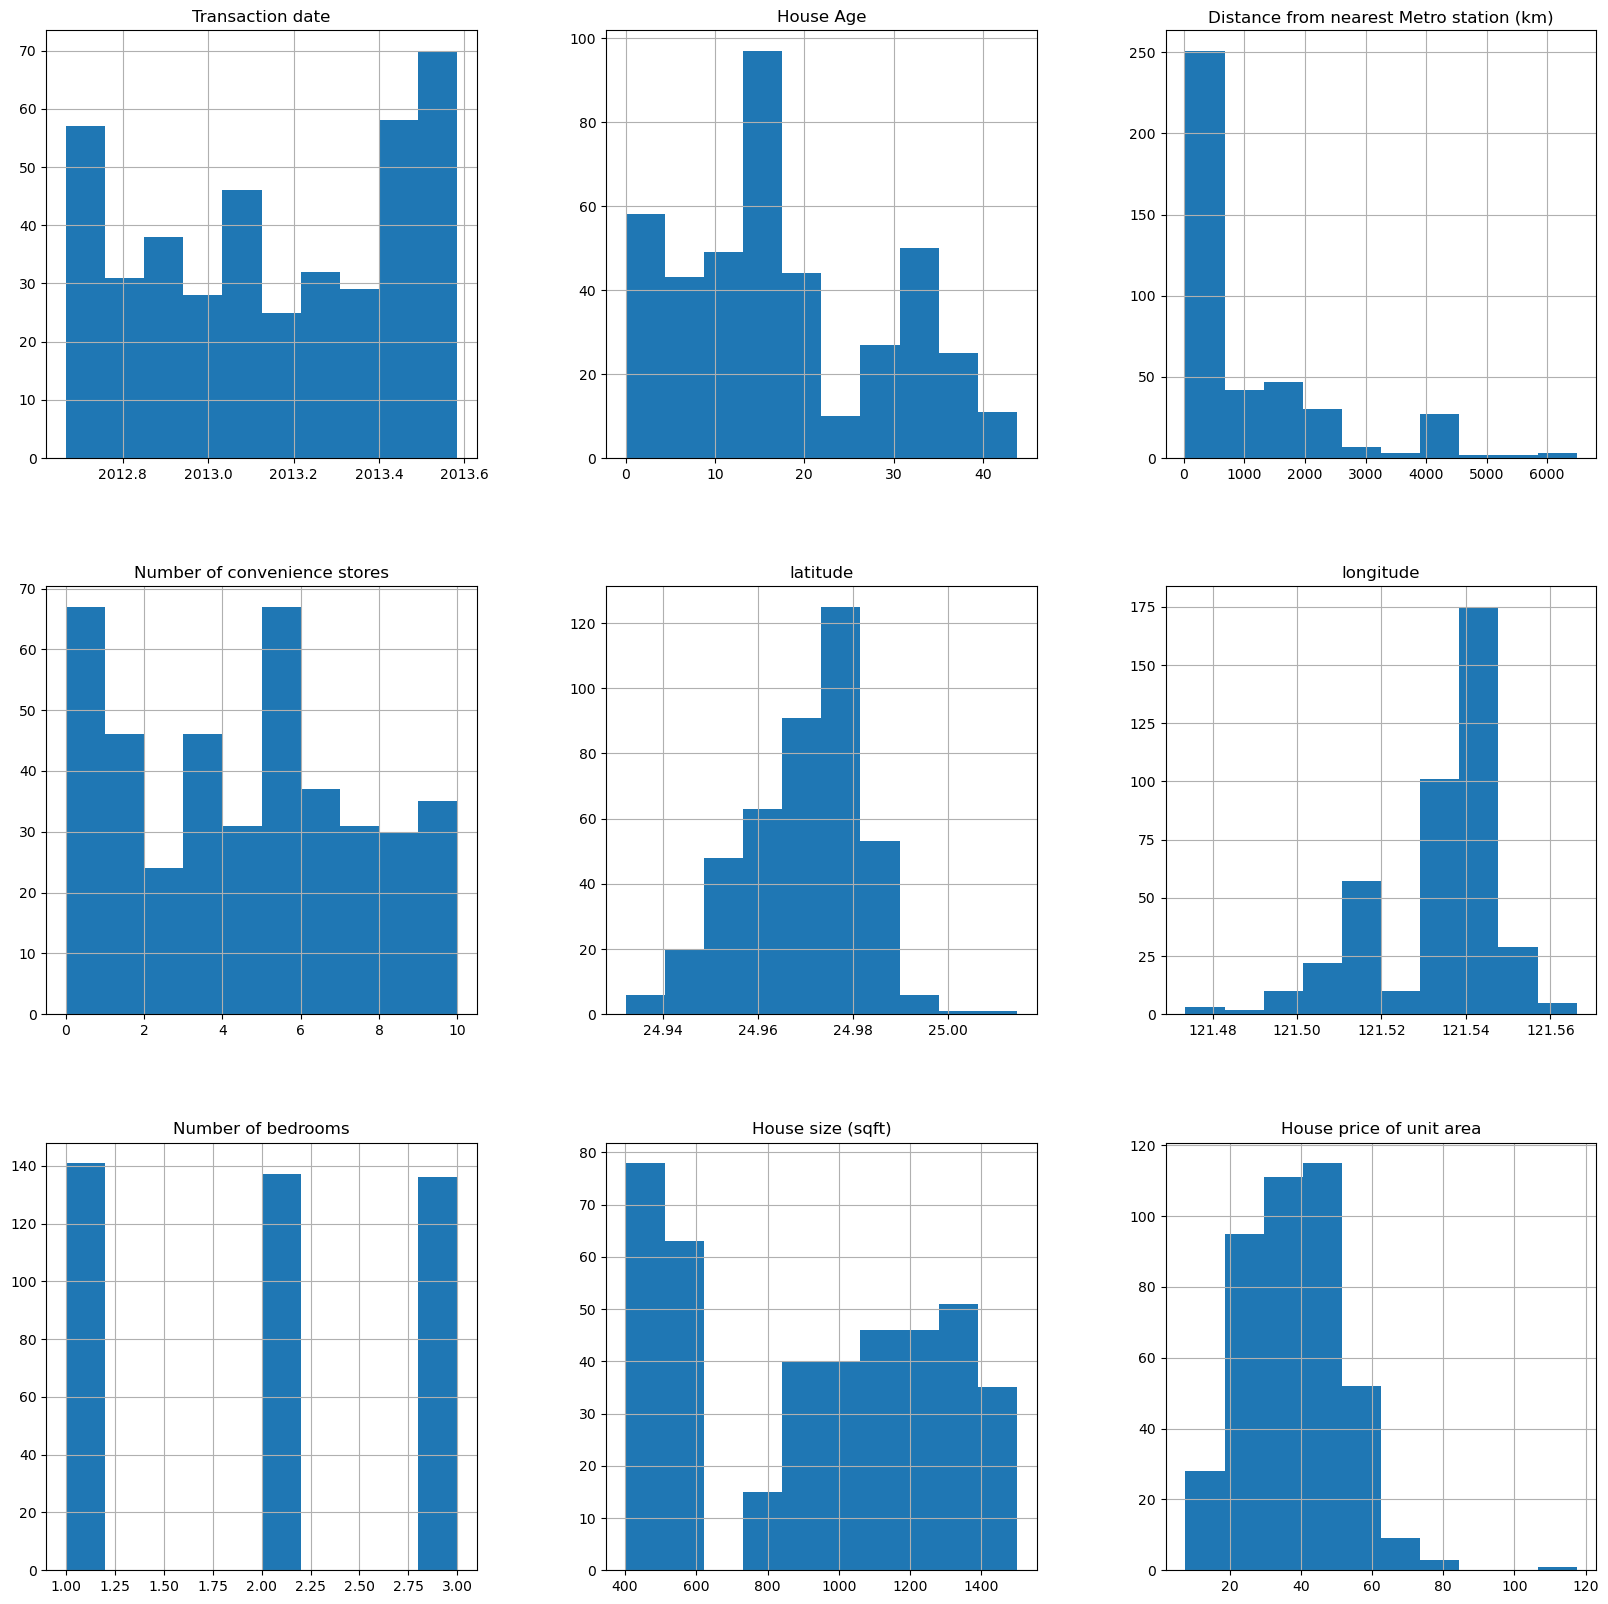

In [12]:
hplot = df.hist(figsize = (20,20))


In [13]:
print(df["House price of unit area"].value_counts())

42.5    4
40.3    4
29.3    4
40.6    4
37.4    4
       ..
55.9    1
22.9    1
21.5    1
55.1    1
63.9    1
Name: House price of unit area, Length: 270, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.35,random_state=30)

In [19]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square



In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])

#what are pipelines 
# what are we doing in the above line

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

X_train[0]

array([-0.17411478, -0.08640567, -0.72551143,  1.34374718,  0.67534016,
        0.61117188,  1.25667984, -0.12780842])

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True) 
lin_reg.fit(X_train,Y_train)

C:\Users\Anant Paliwal\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [22]:
# print the intercept
print(lin_reg.intercept_)

[36.67472119]


# Predictions from our Model

In [23]:
pred = lin_reg.predict(X_test)

In [24]:
pred[0]


array([31.52425863])

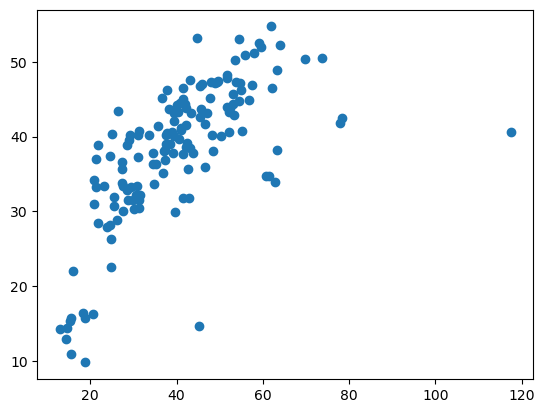

In [25]:
plt.scatter(Y_test, pred)
#how to draw the regression line in the following plot

# Residual Histogram

C:\Users\Anant Paliwal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


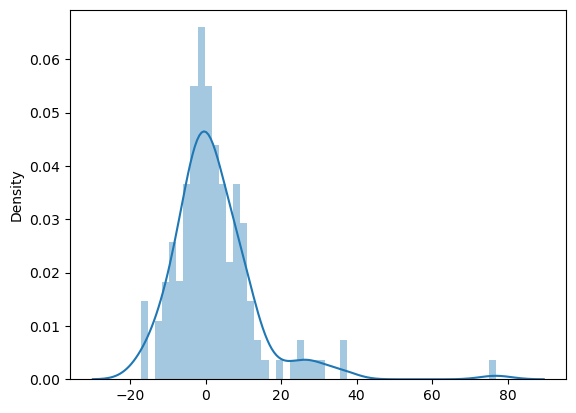

In [26]:
sns.distplot((Y_test - pred), bins=50);  # what does this tell?

# Regression Evaluation Metrics

In [27]:
%matplotlib inline
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.365469367941233
MSE: 135.72709973788702
RMSE: 11.650197411970623
R2 Square 0.42205335668017074
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.323626673027916
MSE: 48.408902595709485
RMSE: 6.95765065203115
R2 Square 0.6831639769592177
__________________________________


In [28]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

# what is cross_vaidation here  cross_val(LinearRegression())?

# how to interpret e values 1.006842e+10?

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.365469,135.7271,11.650197,0.422053,0.57703


# Robust Regression

In [29]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 8.683060741199363
MSE: 189.01270597948684
RMSE: 13.7481891891073
R2 Square 0.1951551372083945
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.3051067703058905
MSE: 125.1736361274827
RMSE: 11.188102436404607
R2 Square 0.18073918362899122
__________________________________


In [30]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(Y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Anant Paliwal\AppData\Local\Temp\ipykernel_8916\272284539.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.365469,135.727100,11.650197,0.422053,0.577030
1,Robust Regression,8.683061,189.012706,13.748189,0.195155,0.325149


In [31]:
results_df.MSE[1]

189.01270597948684

# Ridge Regression

In [32]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.689261915357267
MSE: 141.04309941391932
RMSE: 11.87615676108729
R2 Square 0.39941702116143174
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.527022819926247
MSE: 51.608957770612356
RMSE: 7.183937483762811
R2 Square 0.6622196319986451
__________________________________


In [33]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(Y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Anant Paliwal\AppData\Local\Temp\ipykernel_8916\3847502893.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.365469,135.727100,11.650197,0.422053,0.577030
1,Robust Regression,8.683061,189.012706,13.748189,0.195155,0.325149
2,Ridge Regression,7.689262,141.043099,11.876157,0.399417,0.556839


# LASSO Regression

In [34]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 8.200696027092691
MSE: 153.56286269482982
RMSE: 12.39204836557822
R2 Square 0.3461059640671993
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.227650543314332
MSE: 65.54657328766164
RMSE: 8.096083824149899
R2 Square 0.5709980088196727
__________________________________


In [35]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(Y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Anant Paliwal\AppData\Local\Temp\ipykernel_8916\2195001867.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.365469,135.727100,11.650197,0.422053,0.577030
1,Robust Regression,8.683061,189.012706,13.748189,0.195155,0.325149
2,Ridge Regression,7.689262,141.043099,11.876157,0.399417,0.556839
3,Lasso Regression,8.200696,153.562863,12.392048,0.346106,0.543471


# Elastic Net

In [36]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.386935912030223
MSE: 136.26341856017464
RMSE: 11.673192303743422
R2 Square 0.4197696295270159
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.32841957861297
MSE: 48.46568175186992
RMSE: 6.961729795953727
R2 Square 0.6827923576688628
__________________________________


In [37]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(Y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Anant Paliwal\AppData\Local\Temp\ipykernel_8916\3214791754.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.365469,135.727100,11.650197,0.422053,0.577030
1,Robust Regression,8.683061,189.012706,13.748189,0.195155,0.325149
2,Ridge Regression,7.689262,141.043099,11.876157,0.399417,0.556839
3,Lasso Regression,8.200696,153.562863,12.392048,0.346106,0.543471
4,Elastic Net Regression,7.386936,136.263419,11.673192,0.419770,0.543508


# Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,Y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 6.741959059678544
MSE: 113.54418407906111
RMSE: 10.65571133613618
R2 Square 0.5165115869733402
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.8865868127821015
MSE: 27.394782091567357
RMSE: 5.2340024925067965
R2 Square 0.8207012895448217
__________________________________


C:\Users\Anant Paliwal\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [39]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(Y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Anant Paliwal\AppData\Local\Temp\ipykernel_8916\4084272602.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.365469,135.727100,11.650197,0.422053,0.577030
1,Robust Regression,8.683061,189.012706,13.748189,0.195155,0.325149
2,Ridge Regression,7.689262,141.043099,11.876157,0.399417,0.556839
3,Lasso Regression,8.200696,153.562863,12.392048,0.346106,0.543471
4,Elastic Net Regression,7.386936,136.263419,11.673192,0.419770,0.543508
5,Polynomail Regression,6.741959,113.544184,10.655711,0.516512,0.000000


# Stochastic Gradient Descent

In [40]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, Y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

C:\Users\Anant Paliwal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set evaluation:
_____________________________________
MAE: 7.456190807373282
MSE: 141.5740802745146
RMSE: 11.898490672119495
R2 Square 0.3971560238614028
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.361715102797875
MSE: 49.425597934452014
RMSE: 7.030334126800234
R2 Square 0.676509711101106
__________________________________


In [41]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(Y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Anant Paliwal\AppData\Local\Temp\ipykernel_8916\423436366.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.365469,135.727100,11.650197,0.422053,0.577030
1,Robust Regression,8.683061,189.012706,13.748189,0.195155,0.325149
2,Ridge Regression,7.689262,141.043099,11.876157,0.399417,0.556839
3,Lasso Regression,8.200696,153.562863,12.392048,0.346106,0.543471
4,Elastic Net Regression,7.386936,136.263419,11.673192,0.419770,0.543508
5,Polynomail Regression,6.741959,113.544184,10.655711,0.516512,0.000000
6,Stochastic Gradient Descent,7.456191,141.574080,11.898491,0.397156,0.000000


# Artficial Neural Network

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

# why do we need optimizers?

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu')) # The input layer should have only the number of independant columns?
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1)) # For a regression the output layer alway has only one layer.

model.compile(optimizer=Adam(0.00001), loss='mse')  # what is 0.00001 here?

r = model.fit(X_train, Y_train,
              validation_data=(X_test,Y_test), # so here we are saying that use X_train, y_train to find the model and use X_test and y_test to validate the model?
              batch_size=1, #what is batch_size?
              epochs=100) # epochs are no. of learning iterations. in each epoch one forward and one back propagation hapens? 

# what elase hapens in the epoch at Neural network level?

Epoch 1/100
269/269 [==============================] - 4s 7ms/step - loss: 1488.9308 - val_loss: 1843.3381
Epoch 2/100
269/269 [==============================] - 1s 4ms/step - loss: 1462.7498 - val_loss: 1808.4750
Epoch 3/100
269/269 [==============================] - 1s 4ms/step - loss: 1425.1213 - val_loss: 1755.7700
Epoch 4/100
269/269 [==============================] - 1s 5ms/step - loss: 1368.7778 - val_loss: 1676.2784
Epoch 5/100
269/269 [==============================] - 1s 5ms/step - loss: 1285.5148 - val_loss: 1560.8909
Epoch 6/100
269/269 [==============================] - 1s 4ms/step - loss: 1169.9779 - val_loss: 1404.1443
Epoch 7/100
269/269 [==============================] - 1s 5ms/step - loss: 1023.4014 - val_loss: 1217.4773
Epoch 8/100
269/269 [==============================] - 1s 4ms/step - loss: 863.3249 - val_loss: 1017.1573
Epoch 9/100
269/269 [==============================] - 1s 4ms/step - loss: 705.6218 - val_loss: 837.9472
Epoch 10/100
269/269 [==================

269/269 [==============================] - 1s 4ms/step - loss: 87.2215 - val_loss: 167.2554
Epoch 79/100
269/269 [==============================] - 1s 4ms/step - loss: 83.8128 - val_loss: 166.6437
Epoch 80/100
269/269 [==============================] - 1s 4ms/step - loss: 85.7608 - val_loss: 165.7379
Epoch 81/100
269/269 [==============================] - 1s 4ms/step - loss: 83.8368 - val_loss: 165.2091
Epoch 82/100
269/269 [==============================] - 1s 4ms/step - loss: 84.8177 - val_loss: 163.5675
Epoch 83/100
269/269 [==============================] - 1s 4ms/step - loss: 82.4417 - val_loss: 162.8808
Epoch 84/100
269/269 [==============================] - 1s 4ms/step - loss: 78.7904 - val_loss: 161.7631
Epoch 85/100
269/269 [==============================] - 1s 4ms/step - loss: 79.9817 - val_loss: 162.1225
Epoch 86/100
269/269 [==============================] - 1s 4ms/step - loss: 77.4952 - val_loss: 159.6306
Epoch 87/100
269/269 [==============================] - 1s 4ms/step 

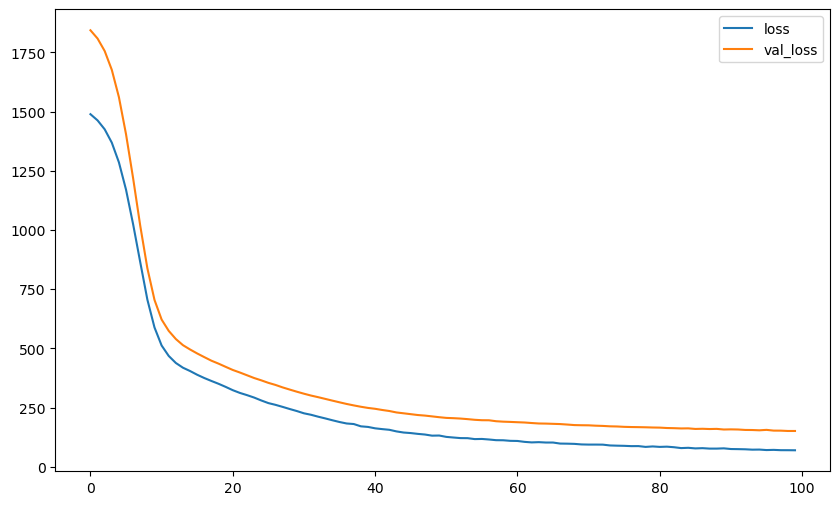

In [43]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [44]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

9/9 [==============================] - 0s 2ms/step
Test set evaluation:
_____________________________________
MAE: 7.889637964182888
MSE: 151.05973440472093
RMSE: 12.290636045572294
R2 Square 0.35676466520986805
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.476151705319997
MSE: 67.26380430533143
RMSE: 8.201451353591718
R2 Square 0.5597587404804438
__________________________________


In [45]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(Y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Anant Paliwal\AppData\Local\Temp\ipykernel_8916\1378887125.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.365469,135.727100,11.650197,0.422053,0.577030
1,Robust Regression,8.683061,189.012706,13.748189,0.195155,0.325149
2,Ridge Regression,7.689262,141.043099,11.876157,0.399417,0.556839
3,Lasso Regression,8.200696,153.562863,12.392048,0.346106,0.543471
4,Elastic Net Regression,7.386936,136.263419,11.673192,0.419770,0.543508
5,Polynomail Regression,6.741959,113.544184,10.655711,0.516512,0.000000
6,Stochastic Gradient Descent,7.456191,141.574080,11.898491,0.397156,0.000000
7,Artficial Neural Network,7.889638,151.059734,12.290636,0.356765,0.000000


# Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, Y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

C:\Users\Anant Paliwal\AppData\Local\Temp\ipykernel_8916\3758866532.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, Y_train)


Test set evaluation:
_____________________________________
MAE: 5.858842068965507
MSE: 97.55652007275859
RMSE: 9.877070419550455
R2 Square 0.584589493042297
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.5216483271375523
MSE: 4.361052335762161
RMSE: 2.0883132752923257
R2 Square 0.9714569344842355
__________________________________


In [47]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(Y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Anant Paliwal\AppData\Local\Temp\ipykernel_8916\2161668939.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.365469,135.727100,11.650197,0.422053,0.577030
1,Robust Regression,8.683061,189.012706,13.748189,0.195155,0.325149
2,Ridge Regression,7.689262,141.043099,11.876157,0.399417,0.556839
3,Lasso Regression,8.200696,153.562863,12.392048,0.346106,0.543471
4,Elastic Net Regression,7.386936,136.263419,11.673192,0.419770,0.543508
5,Polynomail Regression,6.741959,113.544184,10.655711,0.516512,0.000000
6,Stochastic Gradient Descent,7.456191,141.574080,11.898491,0.397156,0.000000
7,Artficial Neural Network,7.889638,151.059734,12.290636,0.356765,0.000000
8,Random Forest Regressor,5.858842,97.556520,9.877070,0.584589,0.000000


# Support Vector Machine

In [48]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, Y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

C:\Users\Anant Paliwal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set evaluation:
_____________________________________
MAE: 13.550887056274572
MSE: 354.2664685352539
RMSE: 18.821967711566554
R2 Square -0.5085205292540895
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.004498837922453362
MSE: 4.347418194487758e-05
RMSE: 0.006593495426924749
R2 Square 0.9999997154616987
__________________________________


In [49]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(Y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Anant Paliwal\AppData\Local\Temp\ipykernel_8916\3456270861.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.365469,135.727100,11.650197,0.422053,0.577030
1,Robust Regression,8.683061,189.012706,13.748189,0.195155,0.325149
2,Ridge Regression,7.689262,141.043099,11.876157,0.399417,0.556839
3,Lasso Regression,8.200696,153.562863,12.392048,0.346106,0.543471
4,Elastic Net Regression,7.386936,136.263419,11.673192,0.419770,0.543508
5,Polynomail Regression,6.741959,113.544184,10.655711,0.516512,0.000000
6,Stochastic Gradient Descent,7.456191,141.574080,11.898491,0.397156,0.000000
7,Artficial Neural Network,7.889638,151.059734,12.290636,0.356765,0.000000
8,Random Forest Regressor,5.858842,97.556520,9.877070,0.584589,0.000000
9,SVM Regressor,13.550887,354.266469,18.821968,-0.508521,0.000000


# Models Comparison

<AxesSubplot:ylabel='Model'>

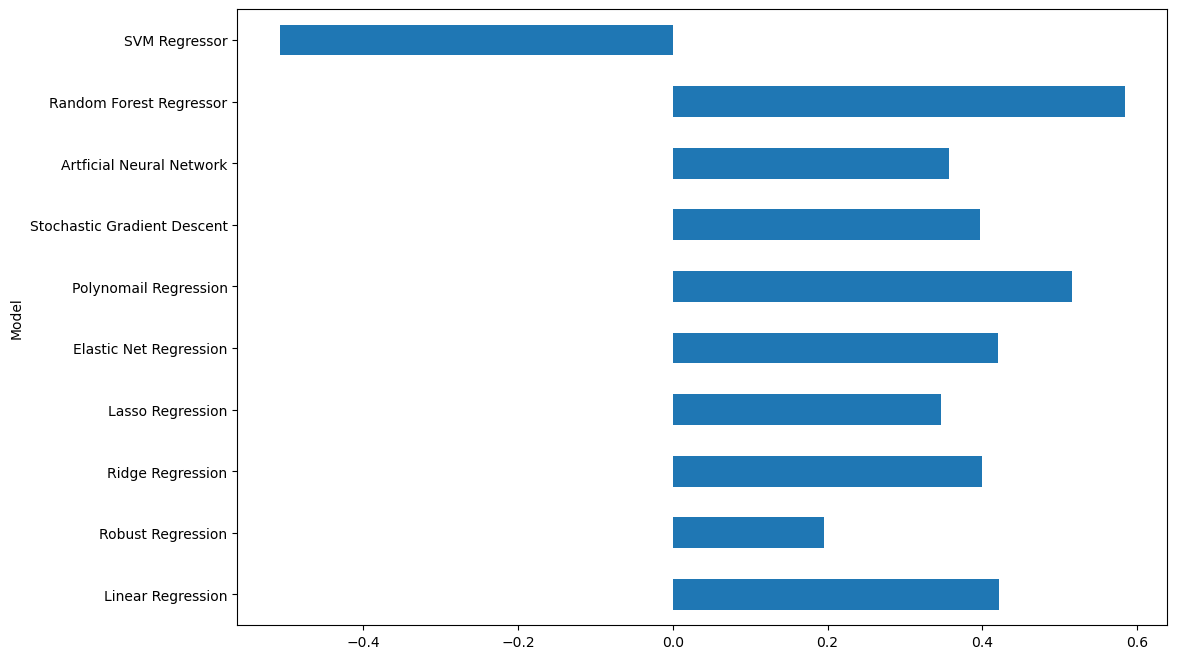

In [50]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))